In [1]:
# セル 1: GPU確認
!nvidia-smi

Mon Jul 28 01:10:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# セル 2: 作業ディレクトリの確認
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# セル 3: 依存ライブラリのインストール
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 740.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3

In [4]:
# セル 4: インポート
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

In [5]:
# セル 5: データ取得
!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get("ROBOFLOW_API_KEY")
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("pd3-9x7yk").project("futsal-ball-detaction-g6ejd")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to futsal-ball-detaction-1 in yolov8:: 100%|██████████| 499/499 [00:00<00:00, 1719.43it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# セル 6：あなたの環境に合わせた data.yaml 修正コマンド
!sed -i 's|train:.*|train: /content/datasets/futsal-ball-detaction-1/train/images|' {dataset.location}/data.yaml
!sed -i 's|val:.*|val: /content/datasets/futsal-ball-detaction-1/valid/images|' {dataset.location}/data.yaml

In [7]:
# セル 7: モデル学習
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=1280 plots=True

/content
100% 6.25M/6.25M [00:00<00:00, 121MB/s]
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/futsal-ball-detaction-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_ma

In [8]:
# セル 8: 結果ファイル一覧
!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	     train_batch442.jpg
BoxF1_curve.png			 results.csv	     val_batch0_labels.jpg
BoxP_curve.png			 results.png	     val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg    val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg    val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg    weights
confusion_matrix.png		 train_batch440.jpg
labels_correlogram.jpg		 train_batch441.jpg


/content


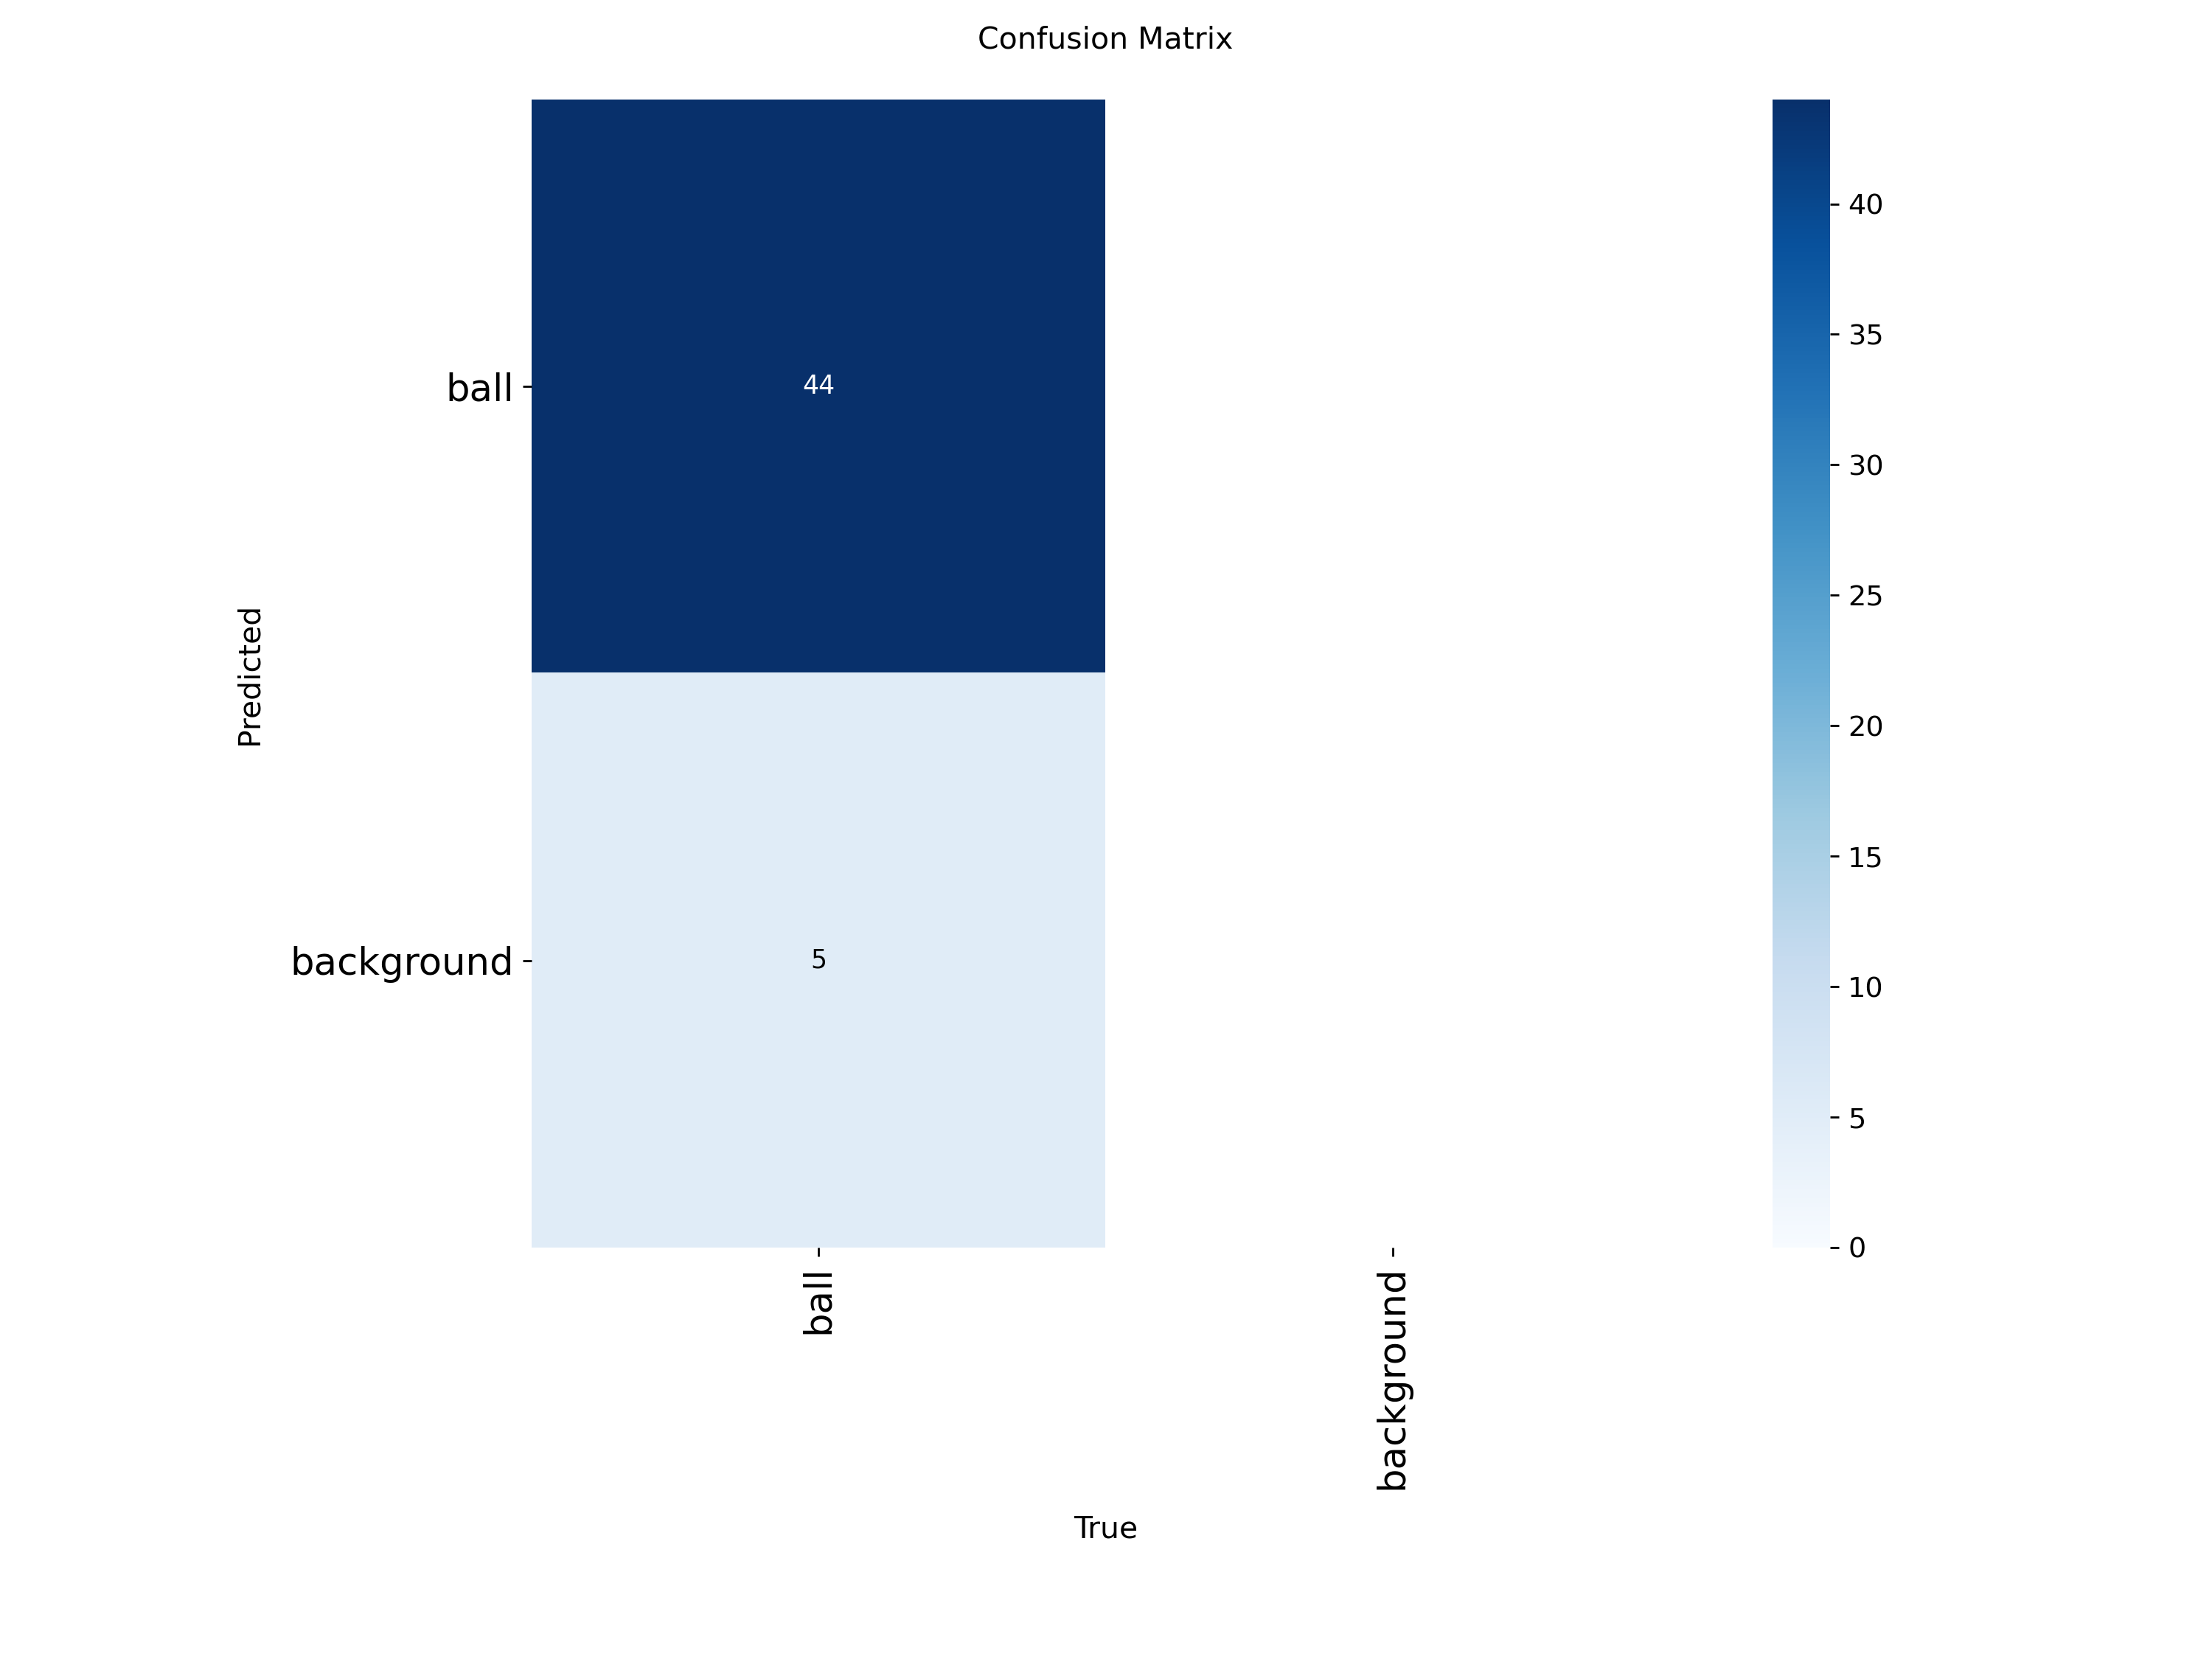

In [9]:
# セル 9: 混同行列の表示
%cd {HOME}
Image(filename=f"{HOME}/runs/detect/train/confusion_matrix.png", width=600)

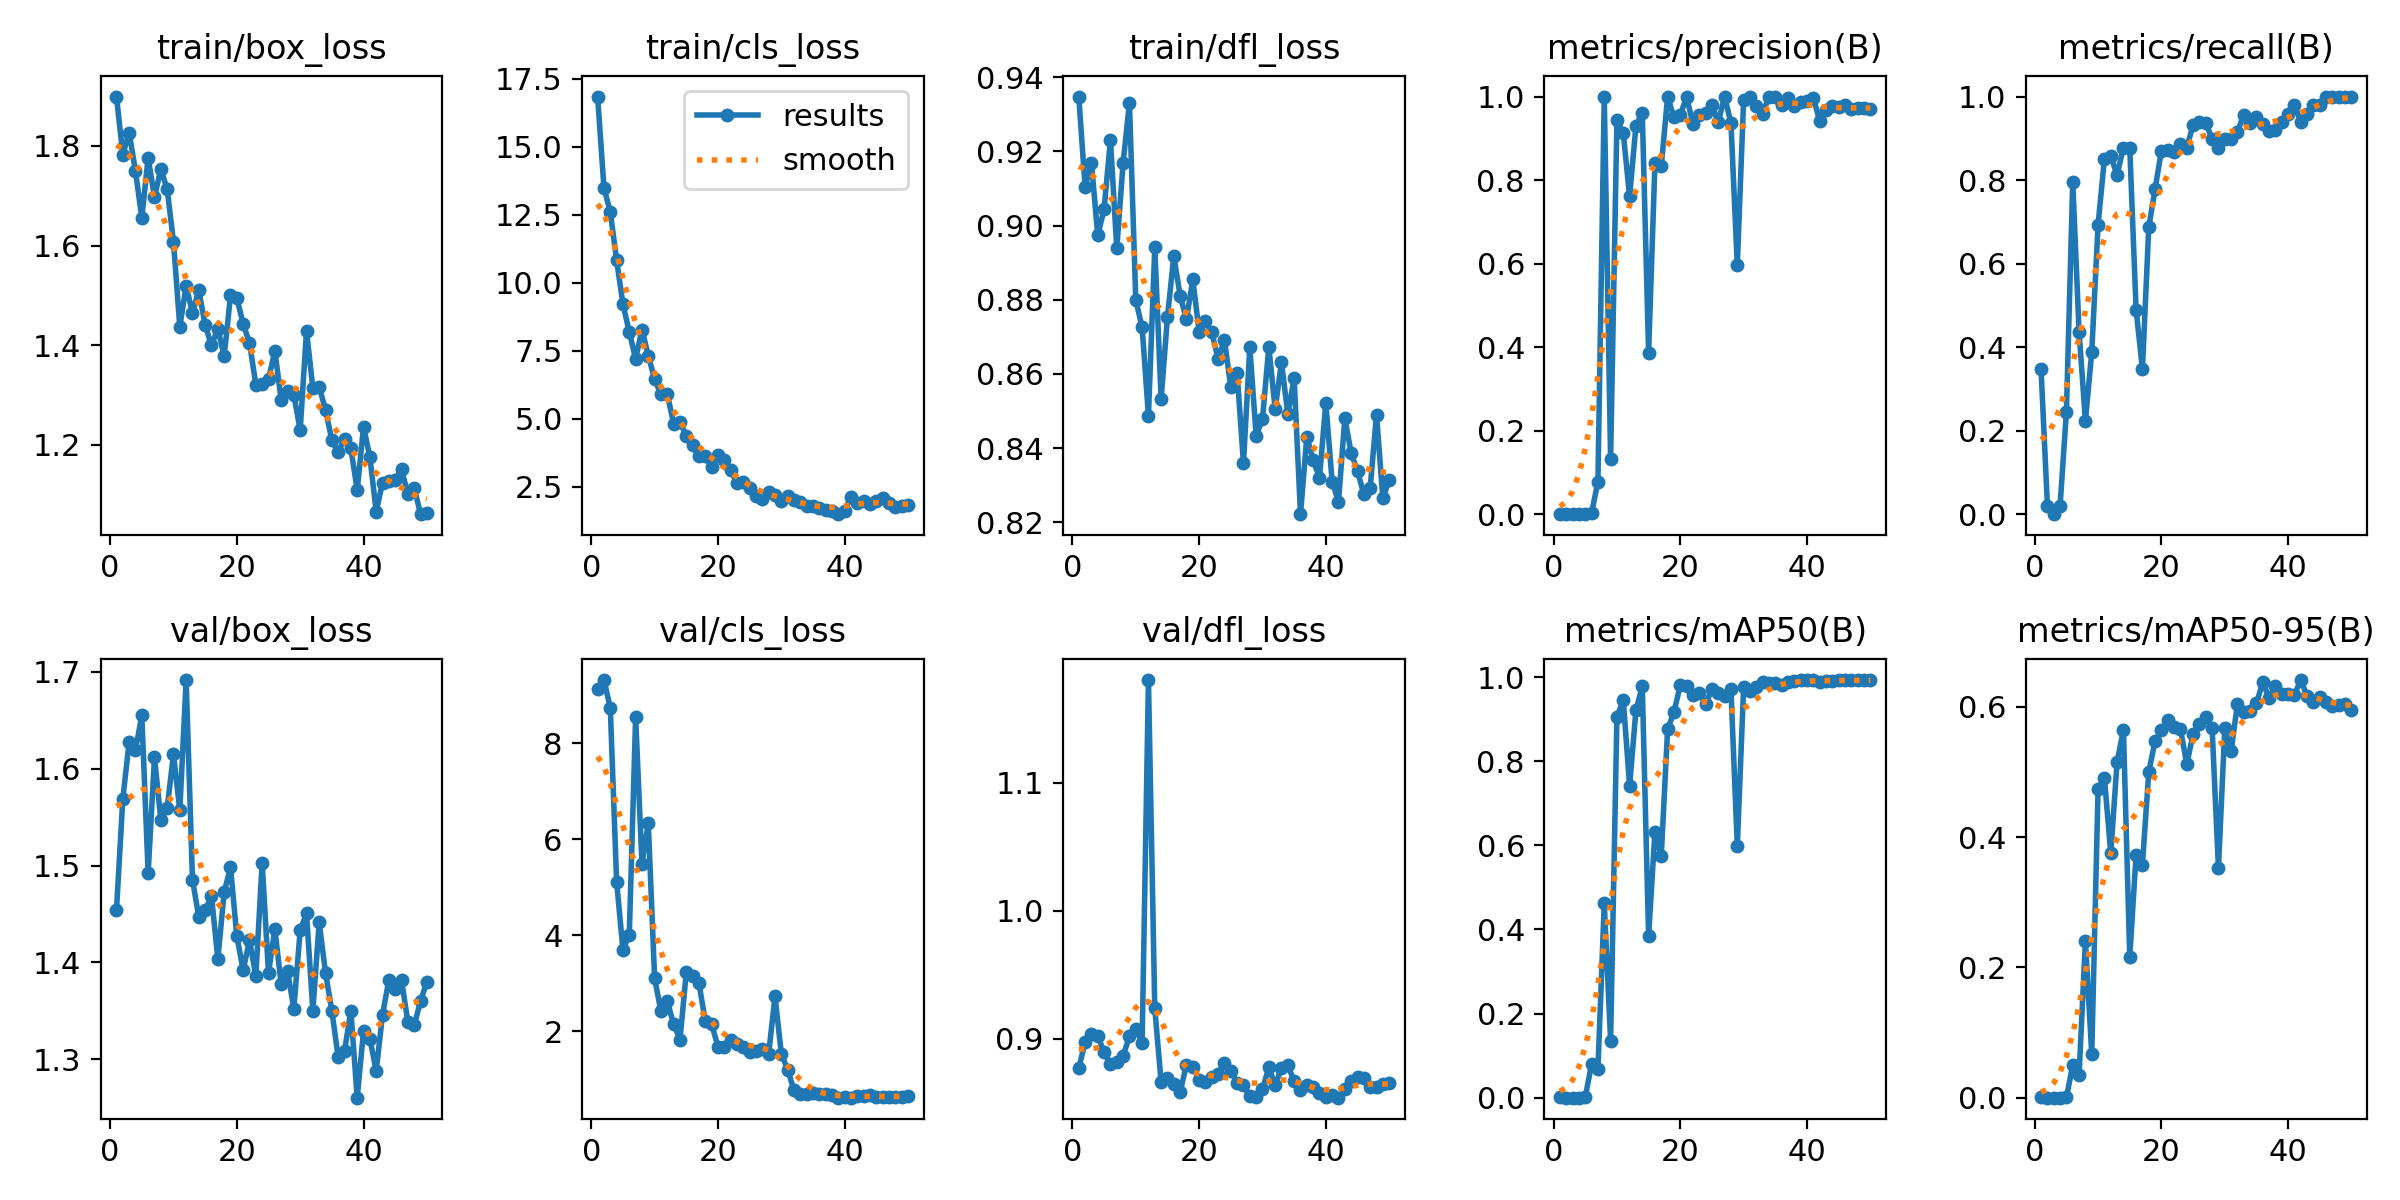

In [10]:
# セル 10: 学習曲線の表示
Image(filename=f"{HOME}/runs/detect/train/results.png", width=600)

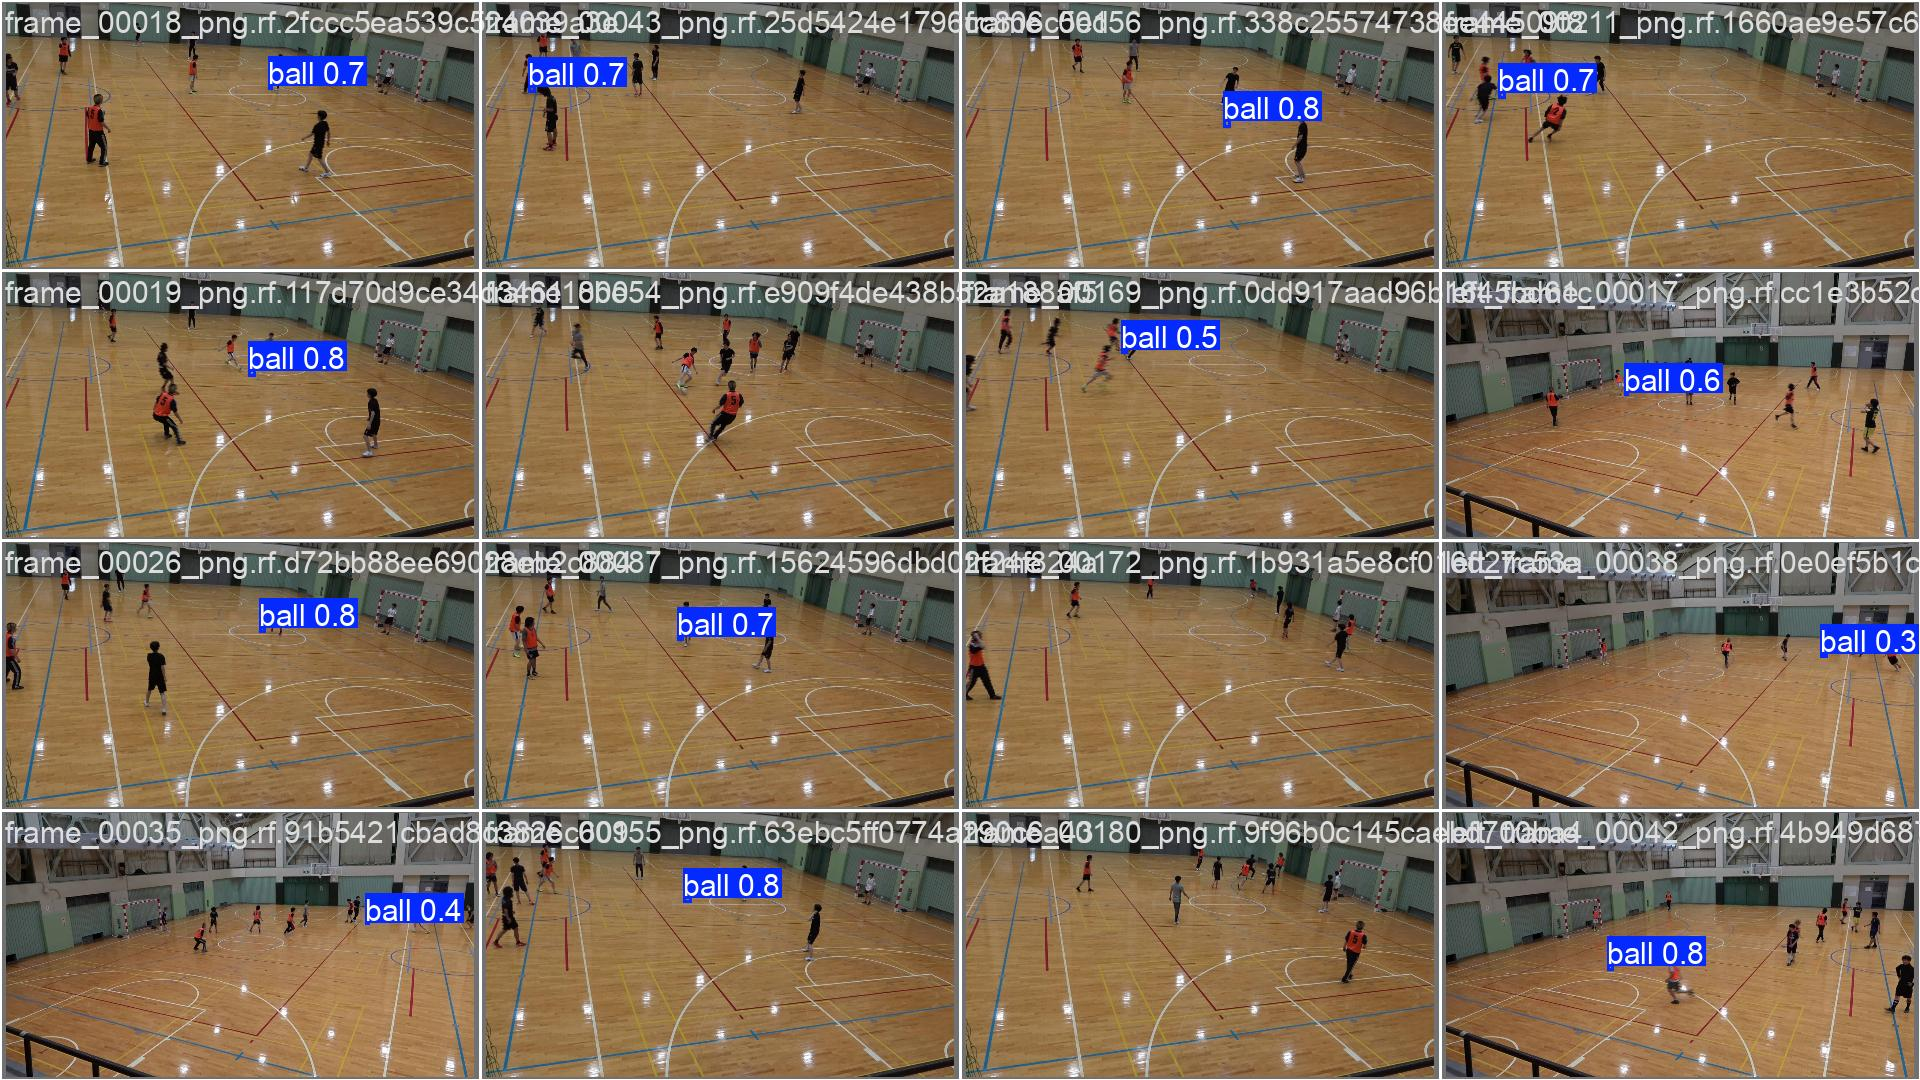

In [11]:
# セル 11: 検出結果画像の表示（予測画像）
Image(filename=f"{HOME}/runs/detect/train/val_batch0_pred.jpg", width=600)

In [12]:
# セル 12: 検証（valモード）
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2730.6±1359.4 MB/s, size: 213.1 KB)
val: Scanning /content/datasets/futsal-ball-detaction-1/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.43it/s]
                   all         49         49      0.942      0.939       0.99      0.629
Speed: 29.2ms preprocess, 10.8ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
